# INM427 Neural Computing Final Coursework
## By Ho Yin Tam

Import the library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc 
from sklearn.svm import SVC
from joblib import dump, load

Import the test dataset.

In [2]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

print('Shape of test data (features):', X_test.shape)
print('Shape of test data (target label):', y_test.shape)

Shape of test data (features): (150, 11)
Shape of test data (target label): (150, 1)


Import the best-trained support vector machines model and use the test dataset to test it.

In [3]:
best_svm_model = load('best_svm_model.joblib')
start_time = time.time()
svm_y_pred = best_svm_model.predict(X_test)
end_time = time.time()
svm_y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

Compute the confusion matrix and visualize it.

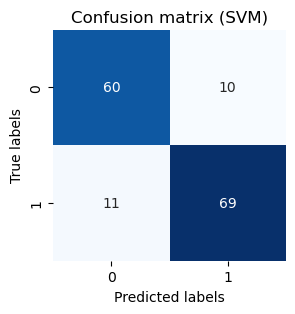

In [4]:
svm_conf_m = confusion_matrix(svm_y_pred, y_test)
svm_conf_m
plt.figure(figsize = (3, 3))
sns.heatmap(svm_conf_m, annot = True, cmap = 'Blues', cbar = False)
plt.title('Confusion matrix (SVM)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Calculate the accuracy, precision, recall, specificity and f1 score and display them.

In [5]:
# Test time (seconds)
test_time =  end_time - start_time

# Accuracy
svm_accuracy = accuracy_score(svm_y_pred, y_test)

# Precision
svm_precision = precision_score(svm_y_pred, y_test)

# Recall
svm_recall = recall_score(svm_y_pred, y_test)

# Specificity
svm_specificity = svm_conf_m[0, 0] / (svm_conf_m[0,0] + svm_conf_m[0,1])

# F1score
svm_f1_score = f1_score(svm_y_pred, y_test)

# Display the results
print('Test time (seconds):', test_time)
print('Accuracy:', svm_accuracy)
print('Precision:', svm_precision)
print('Recall:', svm_recall)
print('Specificity:', svm_specificity)
print('F1 score:', svm_f1_score)

Test time (seconds): 0.004935741424560547
Accuracy: 0.86
Precision: 0.8734177215189873
Recall: 0.8625
Specificity: 0.8571428571428571
F1 score: 0.8679245283018868


Visualize the receiver operating characteristic (ROC) curve and compute the area under the curve (AUC).

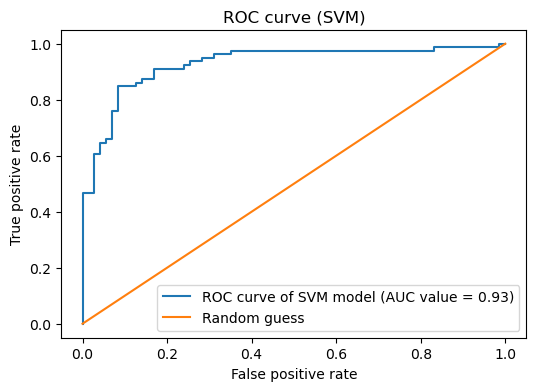

In [6]:
svm_y_score = best_svm_model.decision_function(X_test)
svm_false_pr, svm_true_pr, thresholds = roc_curve(y_test, svm_y_score)
svm_auc_value = auc(svm_false_pr, svm_true_pr)

plt.figure(figsize = (6, 4))

plt.plot(svm_false_pr, svm_true_pr, label = 'ROC curve of SVM model (AUC value = %0.2f)' %svm_auc_value)
plt.plot([0, 1], [0, 1], label = 'Random guess')

plt.title('ROC curve (SVM)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()